# ***Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama***


- Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak
seviye tabanlı (level based) yeni müşteri tanımları (persona)
oluşturmak ve bu yeni müşteri tanımlarına göre segmentler
oluşturup bu segmentlere göre yeni gelebilecek müşterilerin
şirkete ortalama ne kadar kazandırabileceğini tahmin etmek
istemektedir.
- Örneğin:
Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek
kullanıcının ortalama ne kadar kazandırabileceği belirlenmek
isteniyor

- Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu
ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. 

- Veri
seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı
tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir
kullanıcı birden fazla alışveriş yapmış olabilir.

**PRICE** – Müşterinin harcama tutarı

***Değişkenler***

**SOURCE** – Müşterinin bağlandığı cihaz türü

**SEX** – Müşterinin cinsiyeti

**COUNTRY** – Müşterinin ülkesi

**AGE** – Müşterinin yaşı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1: persona.csv dosyasını okutunuz ve veri seti ile ilgili genel bilgileri gösteriniz

In [2]:
df=pd.read_csv(r"C:\Users\ONUR\persona.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [3]:
def check_df(data,head=5):
    print("########### Shape ##############")
    print(data.shape,"\n")
    print("Data Types of the columns")
    print(data.dtypes,"\n")
    print(" Head")
    print(data.head(head),"\n")
    print("Tail")
    print(data.tail(head),"\n")
    print("NA values for each column")
    print(data.isnull().sum(),"\n")
    print("Quantiles")
    print(data.describe([0.05,0.25,0.50,0.75,0.95]).T)
check_df(df)

########### Shape ##############
(5000, 5) 

Data Types of the columns
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object 

 Head
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17 

Tail
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31 

NA values for each column
PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64 

Quantiles
        count     mean        std   min    5%   25%   50%   75%   95%   max
PRICE  5000.0  34.1320  12.464897   9.0  19.0  29.0  39.0  39.0  49.0  59.0
AGE    5000.0  23.5814   8.995908  15.0  15.0  17.0  21.0  27.0  4

## Finding numerical columns

In [4]:
num_col=[col for col in df.columns if str(df[col].dtypes) in ["int64","float64"]]
num_col

['PRICE', 'AGE']

## Finding categorical columns

In [5]:
cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
cat_cols

['SOURCE', 'SEX', 'COUNTRY']

### 1.2: Kaç unique SOURCE vardır? Frekansları nedir?

In [6]:
def cat_summary(dataframe,col_name):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                       "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))


In [7]:
cat_summary(df,"SOURCE")

         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52


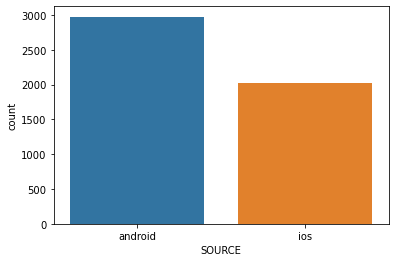

In [8]:
sns.countplot(x="SOURCE",data=df)

### 1.3: Kaç unique PRICE vardır?

In [9]:
df.PRICE.nunique()

6

### 1.4: Hangi PRICE'dan kaçar tane satış gerçekleşmiş?

In [10]:
df.PRICE.value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

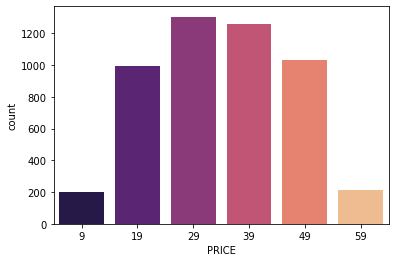

In [11]:
sns.countplot(data=df,x="PRICE",palette="magma")

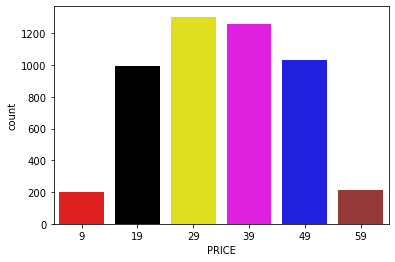

In [12]:
sns.countplot(x="PRICE",data=df,palette=["red","black","yellow","magenta","blue","brown"])

### 1.5: Hangi ülkeden kaçar tane satış olmuş?

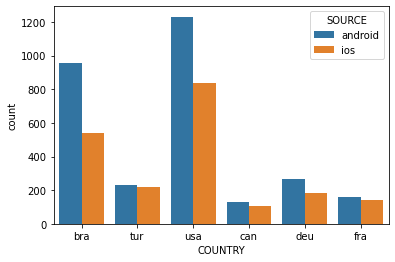

In [13]:
sns.countplot(x="COUNTRY",data=df,hue="SOURCE")

In [14]:
df.COUNTRY.value_counts(normalize=False)

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

### 1.6: Ülkelere göre satışlardan toplam ne kadar kazanılmış

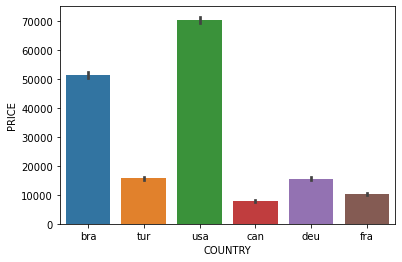

In [15]:
sns.barplot(data=df,x="COUNTRY",y="PRICE",estimator=sum)

In [16]:
df.groupby("COUNTRY")["PRICE"].agg("sum").sort_values(ascending=False)

COUNTRY
usa    70225
bra    51354
tur    15689
deu    15485
fra    10177
can     7730
Name: PRICE, dtype: int64

### 1.7: SOURCE türlerine göre satış sayıları nedir?

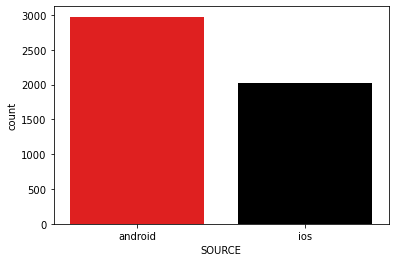

In [17]:
sns.countplot(data=df,x="SOURCE",palette=["red","black"])

In [18]:
df.groupby("SOURCE")["PRICE"].count()

SOURCE
android    2974
ios        2026
Name: PRICE, dtype: int64

### 1.8: Ülkelere göre PRICE ortalamaları nedir

In [19]:
df.columns

Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')

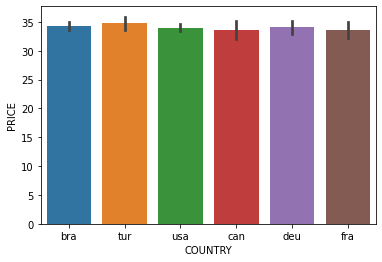

In [20]:
sns.barplot(x="COUNTRY",y="PRICE",data=df)

In [21]:
df.groupby("COUNTRY").agg({"PRICE":"mean"}).reset_index().sort_values("PRICE",ascending=False)

,COUNTRY,PRICE
4,tur,34.787140
0,bra,34.327540
2,deu,34.032967
5,usa,34.007264
1,can,33.608696
3,fra,33.587459


### 1.9: SOURCE'lara göre PRICE ortalamaları nedir?

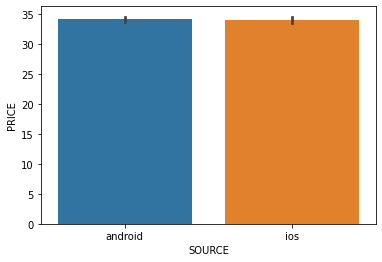

In [22]:
sns.barplot(x="SOURCE",y="PRICE",data=df)

In [23]:
df.groupby("SOURCE").agg({"PRICE":"mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


### 1.10: COUNTRY SOURCE'lara göre PRICE ortalamaları nedir?

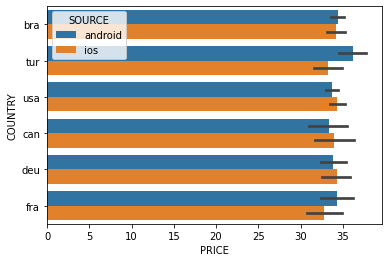

In [24]:
sns.barplot(y="COUNTRY",x="PRICE",hue="SOURCE",data=df)

In [25]:
df.groupby(["COUNTRY","SOURCE"])[["PRICE"]].agg("mean").sort_values("PRICE",ascending=False)

,,PRICE
COUNTRY,SOURCE,
tur,android,36.229437
bra,android,34.387029
usa,ios,34.371703
fra,android,34.312500
deu,ios,34.268817
bra,ios,34.222222
can,ios,33.951456
deu,android,33.869888
usa,android,33.760357


### 2: COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir?

In [26]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).head(5)


PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

**Groupby işlemi ile elde ettiğimiz bu tabloda hangi değişkenlere göre groupby işlemini yaptıysak bu değişkenler**

**MultiIndex'in bir parçası haline gelir.**

In [27]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"])[["PRICE"]].agg("mean").index

MultiIndex([('bra', 'android', 'female', 15),
            ('bra', 'android', 'female', 16),
            ('bra', 'android', 'female', 17),
            ('bra', 'android', 'female', 18),
            ('bra', 'android', 'female', 19),
            ('bra', 'android', 'female', 20),
            ('bra', 'android', 'female', 21),
            ('bra', 'android', 'female', 22),
            ('bra', 'android', 'female', 23),
            ('bra', 'android', 'female', 24),
            ...
            ('usa',     'ios',   'male', 31),
            ('usa',     'ios',   'male', 32),
            ('usa',     'ios',   'male', 33),
            ('usa',     'ios',   'male', 36),
            ('usa',     'ios',   'male', 37),
            ('usa',     'ios',   'male', 42),
            ('usa',     'ios',   'male', 50),
            ('usa',     'ios',   'male', 53),
            ('usa',     'ios',   'male', 55),
            ('usa',     'ios',   'male', 59)],
           names=['COUNTRY', 'SOURCE', 'SEX', 'AGE'], length=34

### 3: Çıktıyı PRICE’a göre sıralayınız

Çıktıyı PRICE değişkenine göre sıralayıp aldığımız çıktıya yeni bir dataframe ismi veriyoruz. Böylece hem

önceki dataframe elimize kalmış oluyor hem de yenisi üzerinde istediğimiz gibi değişiklik yapabiliyoruz.

In [28]:
agg_df=df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"})
agg_df.head()

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

### 4: Indekste yer alan isimleri değişken ismine çeviriniz

Groupby fonksiyonu sonucu MultiIndex'in bir parçası olan değişkenleri tekrar ait oldukları sütunlara göndermek için 

reset_index adlı fonksiyonu kullanıyoruz. Bu fonksiyon hem MultiIndex'teki değişkenleri sütun kısmına geri gönderiyor

hem de index kısmına 0'dan başlayıp satır sayısının bir eksiği olan sayıya kadar olan sayı dizinini yerleştiriyor.

In [29]:
agg_df.reset_index(inplace=True)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897


### 5: Age değişkenini kategorik değişkene çeviriniz ve agg_df’e ekleyiniz

>When to use pd.cut() function?
>> Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.

Elimizde çok fazla eşsiz yaş değeri olduğu için bunları aralıklara ayırmamız segmentasyon konusunda bize çok yardımcı

olacaktır. Aynı zamanda numerik olan **"AGE"** değişkenini de aralıklara ayırarak kategorik değişkene çevirmiş olacağız.

In [30]:
agg_df["AGE_CAT"]=pd.cut(agg_df["AGE"],bins=[0,18,23,30,40,70],labels=["0_18","19_23","24_30","31_40","41_70"])
agg_df[agg_df.AGE==41]

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
22,bra,android,female,41,32.333333,41_70
45,bra,android,male,41,35.666667,41_70
127,deu,android,female,41,27.750000,41_70
293,usa,android,male,41,35.428571,41_70


### 6: Yeni seviye tabanlı müşterileri (persona) tanımlayınız

We should define categorical columns first.

In [31]:
cat_cols=[col for col in agg_df.columns if str(agg_df[col].dtypes) not in ["int64","float64"]]
cat_cols

['COUNTRY', 'SOURCE', 'SEX', 'AGE_CAT']

In [32]:
agg_df[cat_cols].values

array([['bra', 'android', 'female', '0_18'],
       ['bra', 'android', 'female', '0_18'],
       ['bra', 'android', 'female', '0_18'],
       ...,
       ['usa', 'ios', 'male', '41_70'],
       ['usa', 'ios', 'male', '41_70'],
       ['usa', 'ios', 'male', '41_70']], dtype=object)

In [33]:
agg_df["customer_level_based"]=[a.upper()+"_"+b.upper()+"_"+c.upper()+"_"+d for a,b,c,d in agg_df[cat_cols].values]
agg_df.sort_values("PRICE",ascending=False,inplace=True)

In [34]:
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customer_level_based
47,bra,android,male,46,59.0,41_70,BRA_ANDROID_MALE_41_70
290,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
167,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
339,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
125,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [35]:
agg_df=agg_df.groupby("customer_level_based").agg({"PRICE":"mean"}).reset_index()

In [36]:
agg_df.head()

,customer_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179


Customer_level_based değişkeninde herhangi bir değer tekrarı yok. Bunun sebebi bu değişken üzerinden groupby işlemi yapmış olmamız.

In [37]:
agg_df[agg_df.duplicated("customer_level_based")]["customer_level_based"].value_counts()

Series([], Name: customer_level_based, dtype: int64)

### 7: Yeni müşterileri (personaları) segmentlere ayırınız

In [38]:
agg_df.head()

,customer_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179


**pd.qcut** fonksiyonunu kullanarak PRICE değişkenini 4 tane eşit büyüklükte aralığa ayırıyoruz. Böylece bu 4 farklı aralığı müşteri sınıfına göre etiketleyebiliriz. 

Sınıftaki ortalama harcama arttıkça sınıf etiketi de **D->C->B->A** şeklinde devam edecek olup A sınıfı en yüksek harcama ortalamasına sahip müşteri segmentini temsil etmektedir.

In [39]:
agg_df["SEGMENT"]=pd.qcut(agg_df["PRICE"],4,labels=["D","C","B","A"])
agg_df.groupby("SEGMENT").agg({"PRICE":["min","max","mean","count","sum"]})

PRICE                                         
               min        max       mean count          sum
SEGMENT                                                    
D        19.000000  32.333333  29.206780    28   817.789833
C        32.500000  34.077340  33.509674    27   904.761209
B        34.103727  36.000000  34.999645    27   944.990411
A        36.060606  45.428571  38.691234    27  1044.663328

In [40]:
agg_df.head()

,customer_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A


### 8: Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.

Öncelikle yukarıda yaptığımız tüm işlemleri tek bir fonksiyona sığdıralım. Böylece ne yaptığımızı görmesi daha kolay olacaktır.

In [ ]:
def rule_based_classification(data,age_intervals,age_labels,segmentation_number=4,segmentation_labels=["Starter_Level","Medium_Level","High_Level","Premium_Level"]):
    data.columns=[col.lower() for col in data.columns]
    agg_df=df.groupby(["country","source","sex","age"]).agg({"price":"mean"}).reset_index()
    agg_df["age_cat"]=pd.cut(agg_df["age"],bins=age_intervals,labels=age_labels)
    cat_cols=[col for col in agg_df.columns if str(agg_df[col].dtypes) not in ["int64","float64"]]
    agg_df["customer_level_based"]=[a.upper()+"_"+b.upper()+"_"+c.upper()+"_"+d for a,b,c,d in agg_df[cat_cols].values]
    agg_df_segment=agg_df.groupby("customer_level_based").agg({"price":"mean"}).reset_index()
    agg_df_segment["segment_level"]=pd.qcut(agg_df_segment["price"],q=segmentation_number,labels=segmentation_labels)
    return agg_df_segment

In [ ]:
rule_based_classification(df,age_intervals=[0,18,25,30,45,70],age_labels=["0_18","19_25","26_30","31_45","46_70"])

In [ ]:
final_df=rule_based_classification(df,age_intervals=[0,18,25,30,45,70],age_labels=["0_18","19_25","26_30","31_45","46_70"])
final_df.head()

Bize istediğimiz rule_based_classification çıktısını veren fonksiyonu yazdıktan sonra bu çıktıdan istediğimiz bir değeri bize verebilecek bir 

fonksiyon yazmamız da gerekiyor.

In [ ]:
def potential_profit(df):
    while True:
        request=input("Tablodan herhangi bir veri çekmek istiyor musunuz?")
        if request=="evet":
            country=input(""""Bir ülke ismi giriniz:
                          usa: America
                          deu: Germany
                          tur: Turkey
                          bra: Brazil
                          fra: France
                          can: Canada""")
            if country in list(df.country.value_counts().index):
                source=input("""Bir kaynak ismi giriniz:android/ios""")
                if source in list(df.source.value_counts().index):
                    sex=input("""Bir cinsiyet giriniz:female/male""")
                    if sex in list(df.sex.value_counts().index):
                        while True:
                            age=int(input("Lütfen bir yaş değeri giriniz:"))
                            if age not in list(df.age.value_counts().index):
                                print("Lütfen geçerli bir yaş değeri giriniz.")
                                continue
                            else:
                                break
                        if age>0 and age<=18:
                            age_range="0_18"
                        elif age>=19 and age<=25:
                            age_range="19_25"
                        elif age>=26 and age<=30:
                            age_range="26_30"
                        elif age>=31 and age<=45:
                            age_range="31_45"
                        elif age>=46 and age<=70:
                            age_range="46_70"
                        new_user=str(country).upper()+ "_" +str(source).upper()+ "_" +str(sex).upper()+ "_" +str(age_range).upper()
                        print(new_user)
                        print(" -------------Müşterinin potansiyel getirisi---------, \n\n",final_df[final_df["customer_level_based"] == new_user])
                        break
                    else:
                        print("Müşteri portföyünde bulunmayan bir cinsiyet bilgisi girdiniz! Lütfen kontrolleri yapıp tekrardan giriş yapınız...")
                        break
                else:
                    print("Müşteri portföyünde bulunmayan bir kaynak girdiniz! Lütfen kontrolleri yapıp tekrardan giriş yapınız...")
                    break
            else:
                print("Müşteri portföyünde bulunmayan bir ülke kodu girdiniz! Lütfen kontrolleri yapıp tekrardan giriş yapınız...")
                break
        elif request=="hayır":
            print("Programı tercih ettiğiniz için teşekkürler")
            break
                    

                
            

Üstteki iki fonksiyonumuzu birleşimi sonucu alttaki fonksiyonumuz çalıştı.

In [79]:
potential_profit(df)

Tablodan herhangi bir veri çekmek istiyor musunuz? evet


KeyboardInterrupt: Interrupted by user